In [7]:
# Bibliotecas
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# Lendo imagens
vv = gdal.Open('S1A_VV.tif')
vh = gdal.Open('S1A_VH.tif')
VV = vv.GetRasterBand(1).ReadAsArray()
VH = vh.GetRasterBand(1).ReadAsArray()

In [5]:
#Função de expansão
def expansao(img, percent_ini=2, percent_fim=98):
    s = np.zeros_like(img)
    x,y = 0,1  
    w = np.percentile(img, percent_ini)
    z = np.percentile(img, percent_fim)        
    p = x + (img - w) * (y - x) / (z - w)    
    p[p<x] = x
    p[p>y] = y
    s = p
    return s

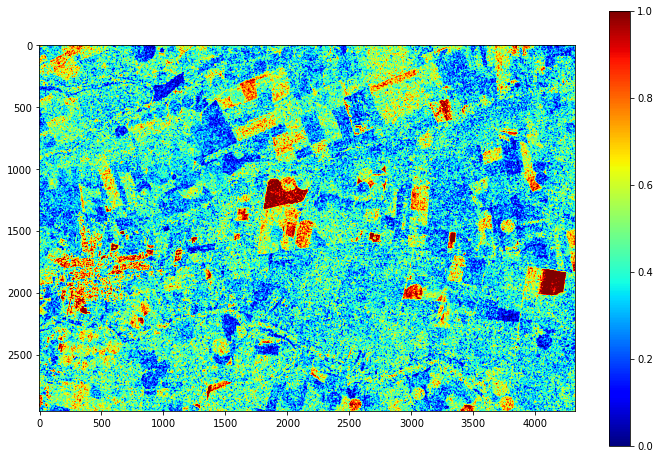

In [18]:
# Grau de polarização
DoP =  (VV/(VV+VH))
# Visualizando resultado
plt.figure(figsize=(12,8))
plt.imshow(expansao(DoP), cmap='jet')
plt.colorbar()
plt.show()